In [1]:
from __future__ import print_function, division
from builtins import range

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
NUM_TRIALS = 100000
BANDITS_MEANS = [5, 10, 20]

In [171]:
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean

        # parameters for mu - prior is N(0, 1)
        self.predicted_mean = 0
        self.lambda_ = 0.005
        self.sum_x = 0
        self.tau = 0.8
        self.N = 0

    def pull(self):
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean

    def sample(self):
        res = np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean
        return res

    def update(self, x):
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau * self.sum_x / self.lambda_
        self.N += 1

In [172]:
def plot(bandits, trial):
    x = np.linspace(-3, 25, 200)
    for b in bandits:
        y = norm.pdf(x, b.predicted_mean, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays = {b.N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

def experiment():
    bandits = [Bandit(p) for p in BANDITS_MEANS]

    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = np.argmax([b.sample() for b in bandits])

        if i in sample_points:
            plot(bandits, i)

        x = bandits[j].pull()
        rewards[i] = x
        rewards[i] = x

        bandits[j].update(x)
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

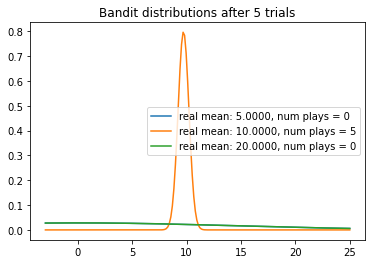

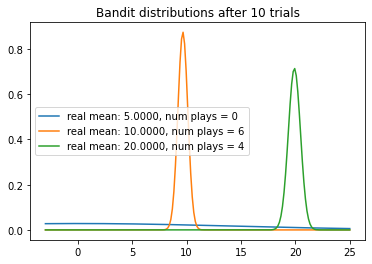

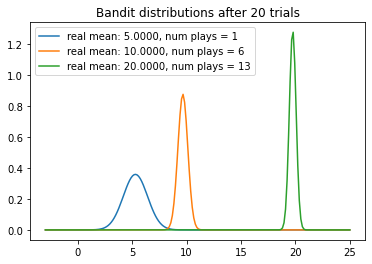

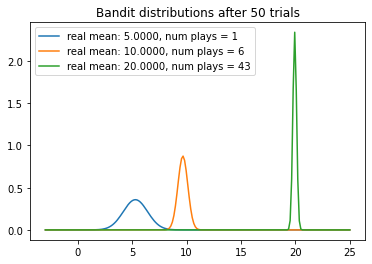

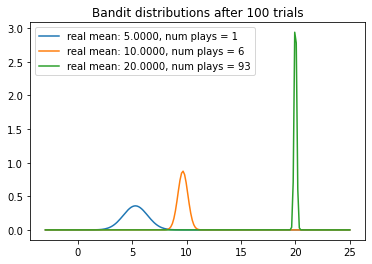

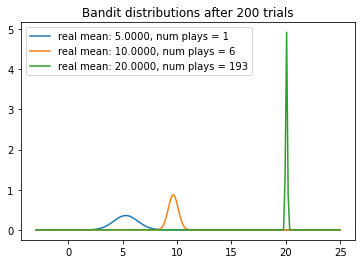

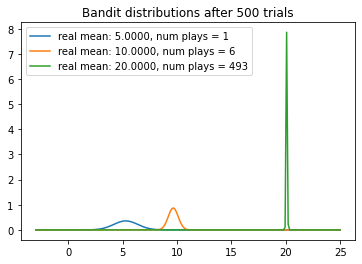

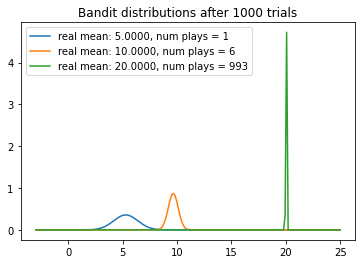

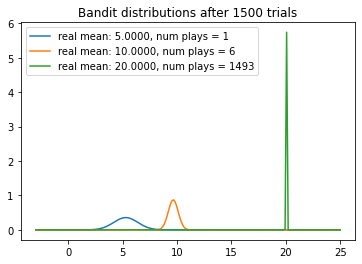

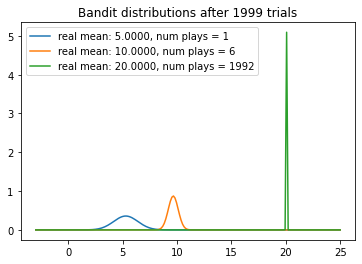

total reward earned: 2000022.021599316
overall win rate: 20.00022021599316
num times selected each bandit: [1, 6, 99993]


In [174]:
experiment()

4.607511005740167

In [123]:
np.random.randn() / np.sqrt(0.005)

1.6462833396740464